In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_raw = pd.read_csv("/Users/akshayokali/akshaynayanravi/my_workspace/salary_satisfaction/salary_satisfaction/model/data/salary,satisfaction.csv")
print(type(data_raw))

<class 'pandas.core.frame.DataFrame'>


Steps to follow:
1. Undersatnd the data
2. Preprocessing - Handle Data Types
3. Handling Missing Values - Delete the rows or replace it mean or median or most frequent value
4. Preprocessing Methods - Binning, Encoding, Feature Engineering
5. Correlation of data
6. Remove unnecessary data

In [3]:
data_raw.head()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,...,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
0,68407277,42405.00,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,•\tExcellent interpersonal and organizational ...,...,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
1,68355089,60740.00,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,...,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756,NaN,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:00:00
2,68341763,51907.68,0,"$20,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,NaN,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:53:00
3,66310712,51907.68,0,"$35,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,2125557818,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:50:00
4,68476807,35.00,1,"$10,400.00",Temporary Painter,PAINTER,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,...,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,26.47.1555,"13011 Newport Ave. #100, Tustin, California, 9...",http://www.tustinbrewery.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:31:00


In [4]:
print(len(data_raw.columns))
print(data_raw.columns)
print(f"Data has {data_raw.shape[0]} rows and {data_raw.shape[1]} columns")

83
Index(['id', 'Target_Salary', 'Target_Satisfied', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Residency Requirement', 'Posting Date', 'Posting Updated',
       'Process Date', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears',
       'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools',
       'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes',
       'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1',
       'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
      

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2946 non-null   int64  
 1   Target_Salary               2946 non-null   float64
 2   Target_Satisfied            2946 non-null   int64  
 3   LOAN_AMT                    2946 non-null   object 
 4   Business Title              2946 non-null   object 
 5   Civil Service Title         2946 non-null   object 
 6   Division/Work Unit          2946 non-null   object 
 7   Job Description             2946 non-null   object 
 8   Minimum Qual Requirements   2926 non-null   object 
 9   Preferred Skills            2553 non-null   object 
 10  Additional Information      1854 non-null   object 
 11  To Apply                    2945 non-null   object 
 12  Hours/Shift                 884 non-null    object 
 13  Residency Requirement       2942 

In [6]:
for i in data_raw.columns:
    print(i)
    print(data_raw[i].describe())
    print("-----------------------------------------------------------------------")

id
count    2.946000e+03
mean     6.830623e+07
std      1.814269e+06
min      3.617740e+05
25%      6.837622e+07
50%      6.846507e+07
75%      6.853764e+07
max      6.861706e+07
Name: id, dtype: float64
-----------------------------------------------------------------------
Target_Salary
count      2946.000000
mean      58904.139794
std       26986.575936
min           0.000000
25%       49390.000000
50%       58440.000000
75%       73171.750000
max      218587.000000
Name: Target_Salary, dtype: float64
-----------------------------------------------------------------------
Target_Satisfied
count    2946.000000
mean        0.210115
std         0.407460
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Target_Satisfied, dtype: float64
-----------------------------------------------------------------------
LOAN_AMT
count            2946
unique            492
top       $15,000.00 
freq              203
Name: LOAN_AMT, dtype: ob

count                                                  2128
unique                                                  264
top       Taught yourself a new language, framework, or ...
freq                                                    179
Name: EducationTypes, dtype: object
-----------------------------------------------------------------------
SelfTaughtTypes
count                                                  1812
unique                                                  226
top       The official documentation and/or standards fo...
freq                                                    113
Name: SelfTaughtTypes, dtype: object
-----------------------------------------------------------------------
TimeAfterBootcamp
count                                                   221
unique                                                    8
top       I already had a full-time job as a developer w...
freq                                                    112
Name: TimeAfterBootcamp, dtyp

count     2946.000000
mean      4663.227026
std       6855.297610
min          0.030000
25%        362.980000
50%        842.235000
75%       6832.185000
max      35467.750000
Name: last_pymnt_amnt, dtype: float64
-----------------------------------------------------------------------
next_pymnt_d
count        336
unique         2
top       19-Apr
freq         335
Name: next_pymnt_d, dtype: object
-----------------------------------------------------------------------
last_credit_pull_d
count       2946
unique        40
top       19-Mar
freq        1287
Name: last_credit_pull_d, dtype: object
-----------------------------------------------------------------------
Time
count                2946
unique                698
top       3/23/2016 11:03
freq                   47
Name: Time, dtype: object
-----------------------------------------------------------------------
emp_length
count           715
unique           11
top       10+ years
freq            322
Name: emp_length, dtype: objec

In [7]:
for i in data_raw.columns:
    print(i)
    print(data_raw[i].head())
    print("-----------------------------------------------------------------------")

id
0    68407277
1    68355089
2    68341763
3    66310712
4    68476807
Name: id, dtype: int64
-----------------------------------------------------------------------
Target_Salary
0    42405.00
1    60740.00
2    51907.68
3    51907.68
4       35.00
Name: Target_Salary, dtype: float64
-----------------------------------------------------------------------
Target_Satisfied
0    0
1    1
2    0
3    0
4    1
Name: Target_Satisfied, dtype: int64
-----------------------------------------------------------------------
LOAN_AMT
0     $3,600.00 
1    $24,700.00 
2    $20,000.00 
3    $35,000.00 
4    $10,400.00 
Name: LOAN_AMT, dtype: object
-----------------------------------------------------------------------
Business Title
0                                      Account Manager
1             EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT
2    Maintenance Worker - Technical Services-Heatin...
3    Maintenance Worker - Technical Services-Heatin...
4                                    Temporary P

## 1. Loan Amount

In [8]:
print(data_raw["LOAN_AMT"].describe())

count            2946
unique            492
top       $15,000.00 
freq              203
Name: LOAN_AMT, dtype: object


In [9]:
def clean_loan_amt(loan_amt):
    loan_amt_clean = str(loan_amt).replace("$", "").replace(",", "")
    loan_amt_clean = float(loan_amt_clean)
    
    return loan_amt_clean

data_raw["LOAN_AMT_CLEAN"] = data_raw["LOAN_AMT"].apply(clean_loan_amt)
print(data_raw["LOAN_AMT"].describe())
print(data_raw["LOAN_AMT_CLEAN"].describe())

count            2946
unique            492
top       $15,000.00 
freq              203
Name: LOAN_AMT, dtype: object
count     2946.000000
mean     15345.663612
std       8636.391303
min       1000.000000
25%       8681.250000
50%      14400.000000
75%      20000.000000
max      35000.000000
Name: LOAN_AMT_CLEAN, dtype: float64


In [14]:
data_raw["LOAN_AMT_CLEAN"].value_counts().to_dict()

{15000.0: 203,
 10000.0: 188,
 20000.0: 180,
 12000.0: 158,
 35000.0: 136,
 24000.0: 101,
 5000.0: 99,
 8000.0: 93,
 18000.0: 82,
 6000.0: 81,
 25000.0: 76,
 16000.0: 75,
 30000.0: 72,
 28000.0: 69,
 21000.0: 53,
 14000.0: 43,
 11000.0: 33,
 9000.0: 32,
 7000.0: 30,
 7200.0: 30,
 2000.0: 24,
 3000.0: 23,
 13000.0: 22,
 4000.0: 21,
 9600.0: 20,
 3600.0: 18,
 5600.0: 18,
 8400.0: 17,
 14400.0: 17,
 17000.0: 14,
 16800.0: 14,
 3500.0: 14,
 2400.0: 13,
 1000.0: 12,
 10500.0: 12,
 4800.0: 11,
 11200.0: 11,
 22000.0: 11,
 12500.0: 11,
 19200.0: 11,
 2500.0: 10,
 13200.0: 10,
 6400.0: 10,
 7500.0: 9,
 21600.0: 9,
 32000.0: 9,
 10800.0: 9,
 5500.0: 8,
 27000.0: 7,
 4500.0: 7,
 11500.0: 6,
 15200.0: 6,
 13500.0: 6,
 22400.0: 6,
 3200.0: 6,
 1500.0: 6,
 5400.0: 6,
 4200.0: 6,
 6500.0: 6,
 20800.0: 5,
 17500.0: 5,
 28800.0: 5,
 19000.0: 5,
 9500.0: 5,
 2800.0: 5,
 9100.0: 5,
 1800.0: 5,
 22500.0: 4,
 17600.0: 4,
 26000.0: 4,
 15600.0: 4,
 33600.0: 4,
 18500.0: 4,
 25200.0: 4,
 9800.0: 4,
 8500.0:

/Users/akshayokali/.local/share/virtualenvs/salary_satisfaction-oMnduqGF/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOAN_AMT_CLEAN', ylabel='Density'>

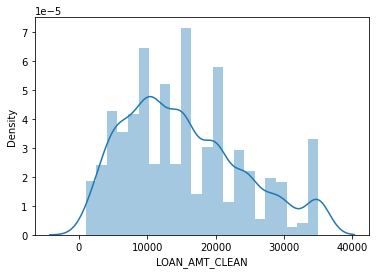

In [10]:
sns.distplot(data_raw["LOAN_AMT_CLEAN"])

In [20]:
print(data_raw["Target_Salary"].corr(data_raw["LOAN_AMT_CLEAN"]))
print(data_raw["Target_Satisfied"].corr(data_raw["LOAN_AMT_CLEAN"]))

-0.005426256783790418
-0.053277975661957765


## 2. Business Title

In [24]:
print(data_raw["Business Title"].describe())
print(data_raw["Business Title"].value_counts().to_dict())

count                         2946
unique                        1244
top       Assistant Civil Engineer
freq                            33
Name: Business Title, dtype: object
{'Assistant Civil Engineer': 33, 'Project Manager': 29, 'College Aide': 24, 'Construction Project Manager': 22, 'ACCOUNTABLE MANAGER': 20, 'Confidential Investigator': 18, 'Watershed Maintainer': 17, 'Investigator': 17, 'Prosecuting Attorney': 16, 'Senior Project Manager': 15, 'Stationary Engineer (Electric)': 13, 'Budget Analyst': 12, 'Civil Engineer 2': 12, 'COMPUTER SPECIALIST (SOFTWARE)': 12, 'Administrative Assistant': 11, 'Civil Engineer 3': 11, 'Data Scientist': 11, 'Deputy Director': 11, 'Information Representative': 10, 'Policy Analyst': 10, 'Community Coordinator': 10, 'Engineering Technician I': 10, 'PROGRAM MANAGER': 10, 'Assistant General Counsel': 10, 'Agency Attorney': 10, 'Electrician': 9, 'Assistant Environmental Engineer': 8, 'Mechanical Engineer': 8, 'Community Assistant': 8, 'ASSISTANT PROJECT

In [25]:
print(data_raw["Target_Salary"].corr(data_raw["Business Title"]))
print(data_raw["Target_Satisfied"].corr(data_raw["Business Title"]))

TypeError: unsupported operand type(s) for /: 'str' and 'int'